<a href="https://colab.research.google.com/github/Elzawawy/covid-case-estimator/blob/master/Our_World_In_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Our World In Data Dataset Exploration

Check out the [Dataset Website](https://ourworldindata.org/coronavirus) !

Also it's available on this [Github Repository](https://github.com/owid/covid-19-data) !

The dataset has 207 **country profiles** which allow you to explore the statistics on the coronavirus pandemic for every country in the world. Every country profile is updated daily. Every profile includes **four sections**:

*  How many people have died from the coronavirus?
*  How much testing for coronavirus do countries conduct? 
*  How many cases were confirmed?
*  What measures did countries take in response to the pandemic?



In [2]:
#imports cell
import pandas as pd
import numpy as np
import pickle
from shutil import copyfile

# Plotting libraries
import matplotlib.pyplot as plt
import plotly.express as px

# mount google drive to copy files from repo into drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Download the dataset
The dataset can be downloaded either from the **website download URL** or from the Github repository file URL.
After downloading the CSV file, I copy it to the permenant storage on Google Drive for future usage.

In [3]:
!wget -O owid-covid-data.csv https://covid.ourworldindata.org/data/owid-covid-data.csv
OWID_COVID_DATA_FILE = "/content/owid-covid-data.csv"
STORAGE_DIR = "/content/drive/My Drive/COVID-19/our-world-in-data/"
copyfile(OWID_COVID_DATA_FILE, STORAGE_DIR+"owid-covid-data.csv");

--2020-05-17 22:04:58--  https://covid.ourworldindata.org/data/owid-covid-data.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 165.227.0.164, 2604:a880:2:d1::1a9:8001
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|165.227.0.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2550705 (2.4M) [text/csv]
Saving to: ‘owid-covid-data.csv’

owid-covid-data.csv 100%[===================>]   2.43M  1.67MB/s    in 1.5s    

2020-05-17 22:04:59 (1.67 MB/s) - ‘owid-covid-data.csv’ saved [2550705/2550705]



## Understanding the dataset
The `OWID(Our World In Data)` covid-19 dataset includes a lot of information, let's break it down:

* `location` & `iso_code` specifiy country. iso_code can be discarded. 

* `data` specifiy the day we are specifiying information for.

* Day-level data: `total_cases` , `new_cases`, `total_deaths`, `new_deaths`, `total_tests`, `new_tests` and their normalized versions (per million).

* Country-level data: `population`, `population_density`, `median_age	`, `aged_65_older`,	`aged_70_older`,	`gdp_per_capita`,	`extreme_poverty`, 	`cvd_death_rate`,	`diabetes_prevalence`	`female_smokers`,	`male_smokers`,	`handwashing_facilities`	`hospital_beds_per_100k`.

More details on each attribute can be found from [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data-codebook.md).

In [4]:
owid_covid_dataframe = pd.read_csv(STORAGE_DIR+"owid-covid-data.csv")
owid_covid_dataframe.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


### Let's Clean: Drop Un-needed columns

*  `iso_code` is not important as location is enough here.

*   normalized cases number per million and thousand is not needed as our problem statement we are tying to solve here is related to the `total_cases` and `new_cases` not their normalized versions.

* We're left with the number of cases, day-related features, and country-related features.



In [5]:
# drop the un-needed columns. 
owid_covid_dataframe = owid_covid_dataframe.drop(columns=[ 'iso_code',
                                                          'total_cases_per_million',
                                                          'new_cases_per_million',
                                                          'total_deaths_per_million',
                                                          'new_deaths_per_million',
                                                          'total_tests_per_thousand',
                                                          'new_tests_per_thousand',
                                                          'tests_units',
                                                          'handwashing_facilities'])
owid_covid_dataframe.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_100k
0,Aruba,2020-03-13,2,2,0,0,NaN,NaN,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN
1,Aruba,2020-03-20,4,2,0,0,NaN,NaN,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN
2,Aruba,2020-03-24,12,8,0,0,NaN,NaN,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN
3,Aruba,2020-03-25,17,5,0,0,NaN,NaN,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN
4,Aruba,2020-03-26,19,2,0,0,NaN,NaN,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN


### Let's Visualize: Plotting World Total Number of Cases against time.

In [6]:
world_data = owid_covid_dataframe[owid_covid_dataframe["location"] == "World"]
# plot the total number of cases aginst time.
fig = px.line(world_data,'date','total_cases',title='Worldwide total confirmed cases vs Time')
fig.show()
# plot the everyday number of cases against time.
fig = px.line(world_data,'date','new_cases',title='Worldwide daily confirmed cases vs Time')
fig.show()

### Let's Select: Feature Selection for Country-Related Features.

* We calculate correlation between features and the `total_cases` (target output) to see what features are more important than others.

* We also plot scatter plots between the most important features from the above calculation to visualize correlation.

In [13]:
# calculate correlation between the features and total_cases target output
owid_covid_dataframe[owid_covid_dataframe.columns[:]].corr()['total_cases'][:]

total_cases               1.000000
new_cases                 0.905602
total_deaths              0.989199
new_deaths                0.852685
total_tests               0.902900
new_tests                 0.855412
population                0.536380
population_density       -0.015857
median_age                0.029302
aged_65_older             0.030692
aged_70_older             0.029596
gdp_per_capita            0.016427
extreme_poverty          -0.023396
cvd_death_rate           -0.035060
diabetes_prevalence       0.011667
female_smokers            0.005561
male_smokers             -0.001562
hospital_beds_per_100k   -0.004168
Name: total_cases, dtype: float64

### Observations 

* We find out that the country **demographic properties are not effective** and have very low effect on the target output `total_cases` xcept for `Population` that shows some potential.

* Thus, we will focus on **3 features** that are important to take as per-country features with `total_cases` target output.

* We move forward to check this observation, by doing some plots to visualize this correlation effect. 

### Plotting Features Correlation Heat Map

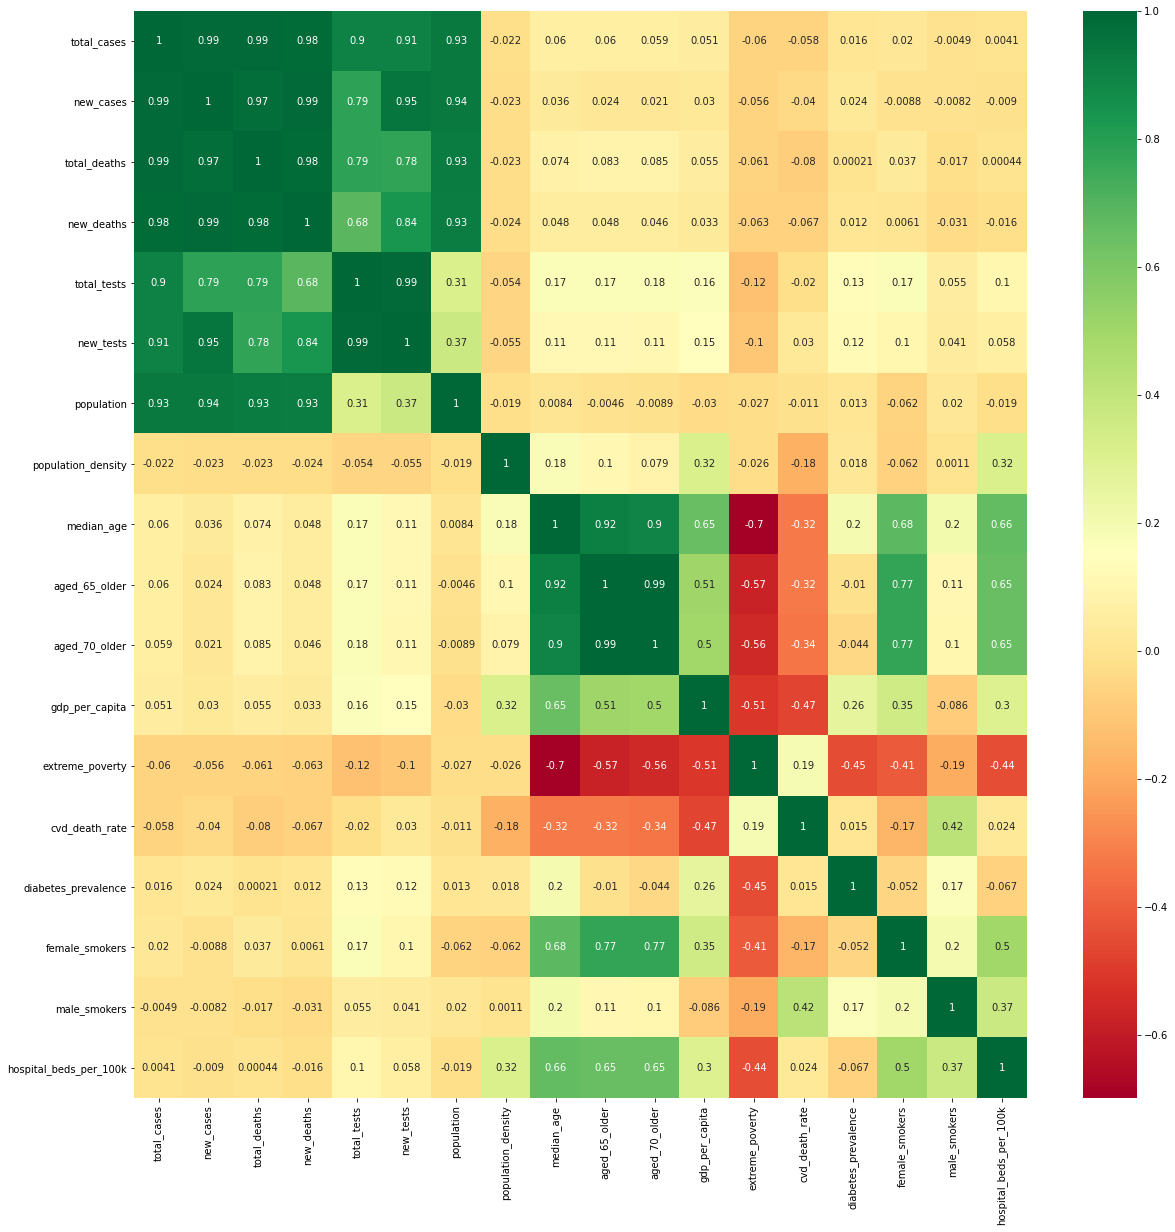

In [14]:
countries = owid_covid_dataframe.location.unique()
temp = []
for country in countries:
  temp.append(owid_covid_dataframe[owid_covid_dataframe['location'] == country].fillna(method='ffill').iloc[-1])
countries_dataframe = pd.DataFrame(temp)

X = countries_dataframe.iloc[:,3:]  #independent columns
y = countries_dataframe.iloc[:,2]    #target column i.e price range
#get correlations of each features in dataset
corrmat = countries_dataframe.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(countries_dataframe[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Plotting Feature Correlation Scatter Matrix

In [15]:
px.scatter(countries_dataframe,'total_deaths','total_cases',title = "Confirmed vs Deaths").show()
px.scatter(countries_dataframe,'total_tests','total_cases',title = "Confirmed vs Tests").show()
px.scatter(countries_dataframe,'population','total_cases',title = "Confirmed vs Population").show()

### Saving Dataset needed Features as Dictionary Format.

* After, building a full understaing for the dataset and features correlation, we now turn our heads to extracting the features we need and saving them as dict pickle files.

* We define in the next cell the needed helper methods to do so. 

In [0]:
def create_daily_feature_dict(dataframe, feature):
  country_cases = {}
  countries = dataframe.location.unique()
  dataframe = dataframe.dropna(subset=[feature])
  for country in countries:
    dict_value = np.array(dataframe[dataframe['location'] == country].sort_values(by=['date'])[['date',feature]])
    if(dict_value.size != 0):
      country_cases[country] = dict_value
  return country_cases

def create_global_feature_dict(dataframe,feature):
  country_feature_dict = {}
  countries = dataframe.location.unique()
  for country in countries:
    dict_value = dataframe[dataframe['location'] == country][feature].dropna()
    if(dict_value.size != 0):
      country_feature_dict[country] = dict_value.iloc[-1]
  return country_feature_dict

def save_dict_to_pickle(dict, pickle_file):
  with open(pickle_file, 'wb') as handle:
    pickle.dump(dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Create a New Confirmed Cases Dictionary
* **Key: Country**
* **Value: array(list(date,new_cases_count))**

Saved to `COVID-19/our-world-in-data/country_confirmed_dict.csv` !

### Create a New Deaths Cases Dictionary
* **Key: Country**
* **Value: array(list(date,new_deaths_count))**

Saved to `COVID-19/our-world-in-data/country_deaths_dict.csv` !

### Create a New Tests Cases Dictionary
* **Key: Country**
* **Value: array(list(date,new_tests_count))**

Saved to `COVID-19/our-world-in-data/country_tests_dict.csv` !

In [0]:
country_daily_features = ['new_cases','new_deaths','new_tests']
for feature in country_daily_features:
  country_feature_dict = create_daily_feature_dict(owid_covid_dataframe,feature)
  save_dict_to_pickle(country_feature_dict, STORAGE_DIR+'{}_dict.pickle'.format(feature))

## Global Features For Each Country

* Next up, we work towards features that we need for the **class 2 model** we are trying out which is a  Total Cases Model where each instance of data resembles a country and its features and the prediction label are the number of total cases in the country.

* Our Word In Data dataset fits well for such case, and has a large corpus of global country features. In particular we extract the following features:

    1- **Total Number of Cases:** total number of confirmed found cases whether they are active, recovered or dead.

    2- **Population:** the number of individuals in a population. 

    3- **Total Deaths:** the number of deaths total in this country.

    4- **Total Tests:** the total number of tests performed by this country.

In [0]:
country_features = ['total_cases','population','total_deaths', 'total_tests']
for feature in country_features:
  country_feature_dict = create_global_feature_dict(owid_covid_dataframe,feature)
  save_dict_to_pickle(country_feature_dict, STORAGE_DIR+'country-features/{}_dict.pickle'.format(feature))